In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/SKawsar/Data_Visualization_with_Python/main/skoda.csv")

In [3]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [4]:

model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

In [5]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_coun

# bar plot

In [6]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Number of cars present for each " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

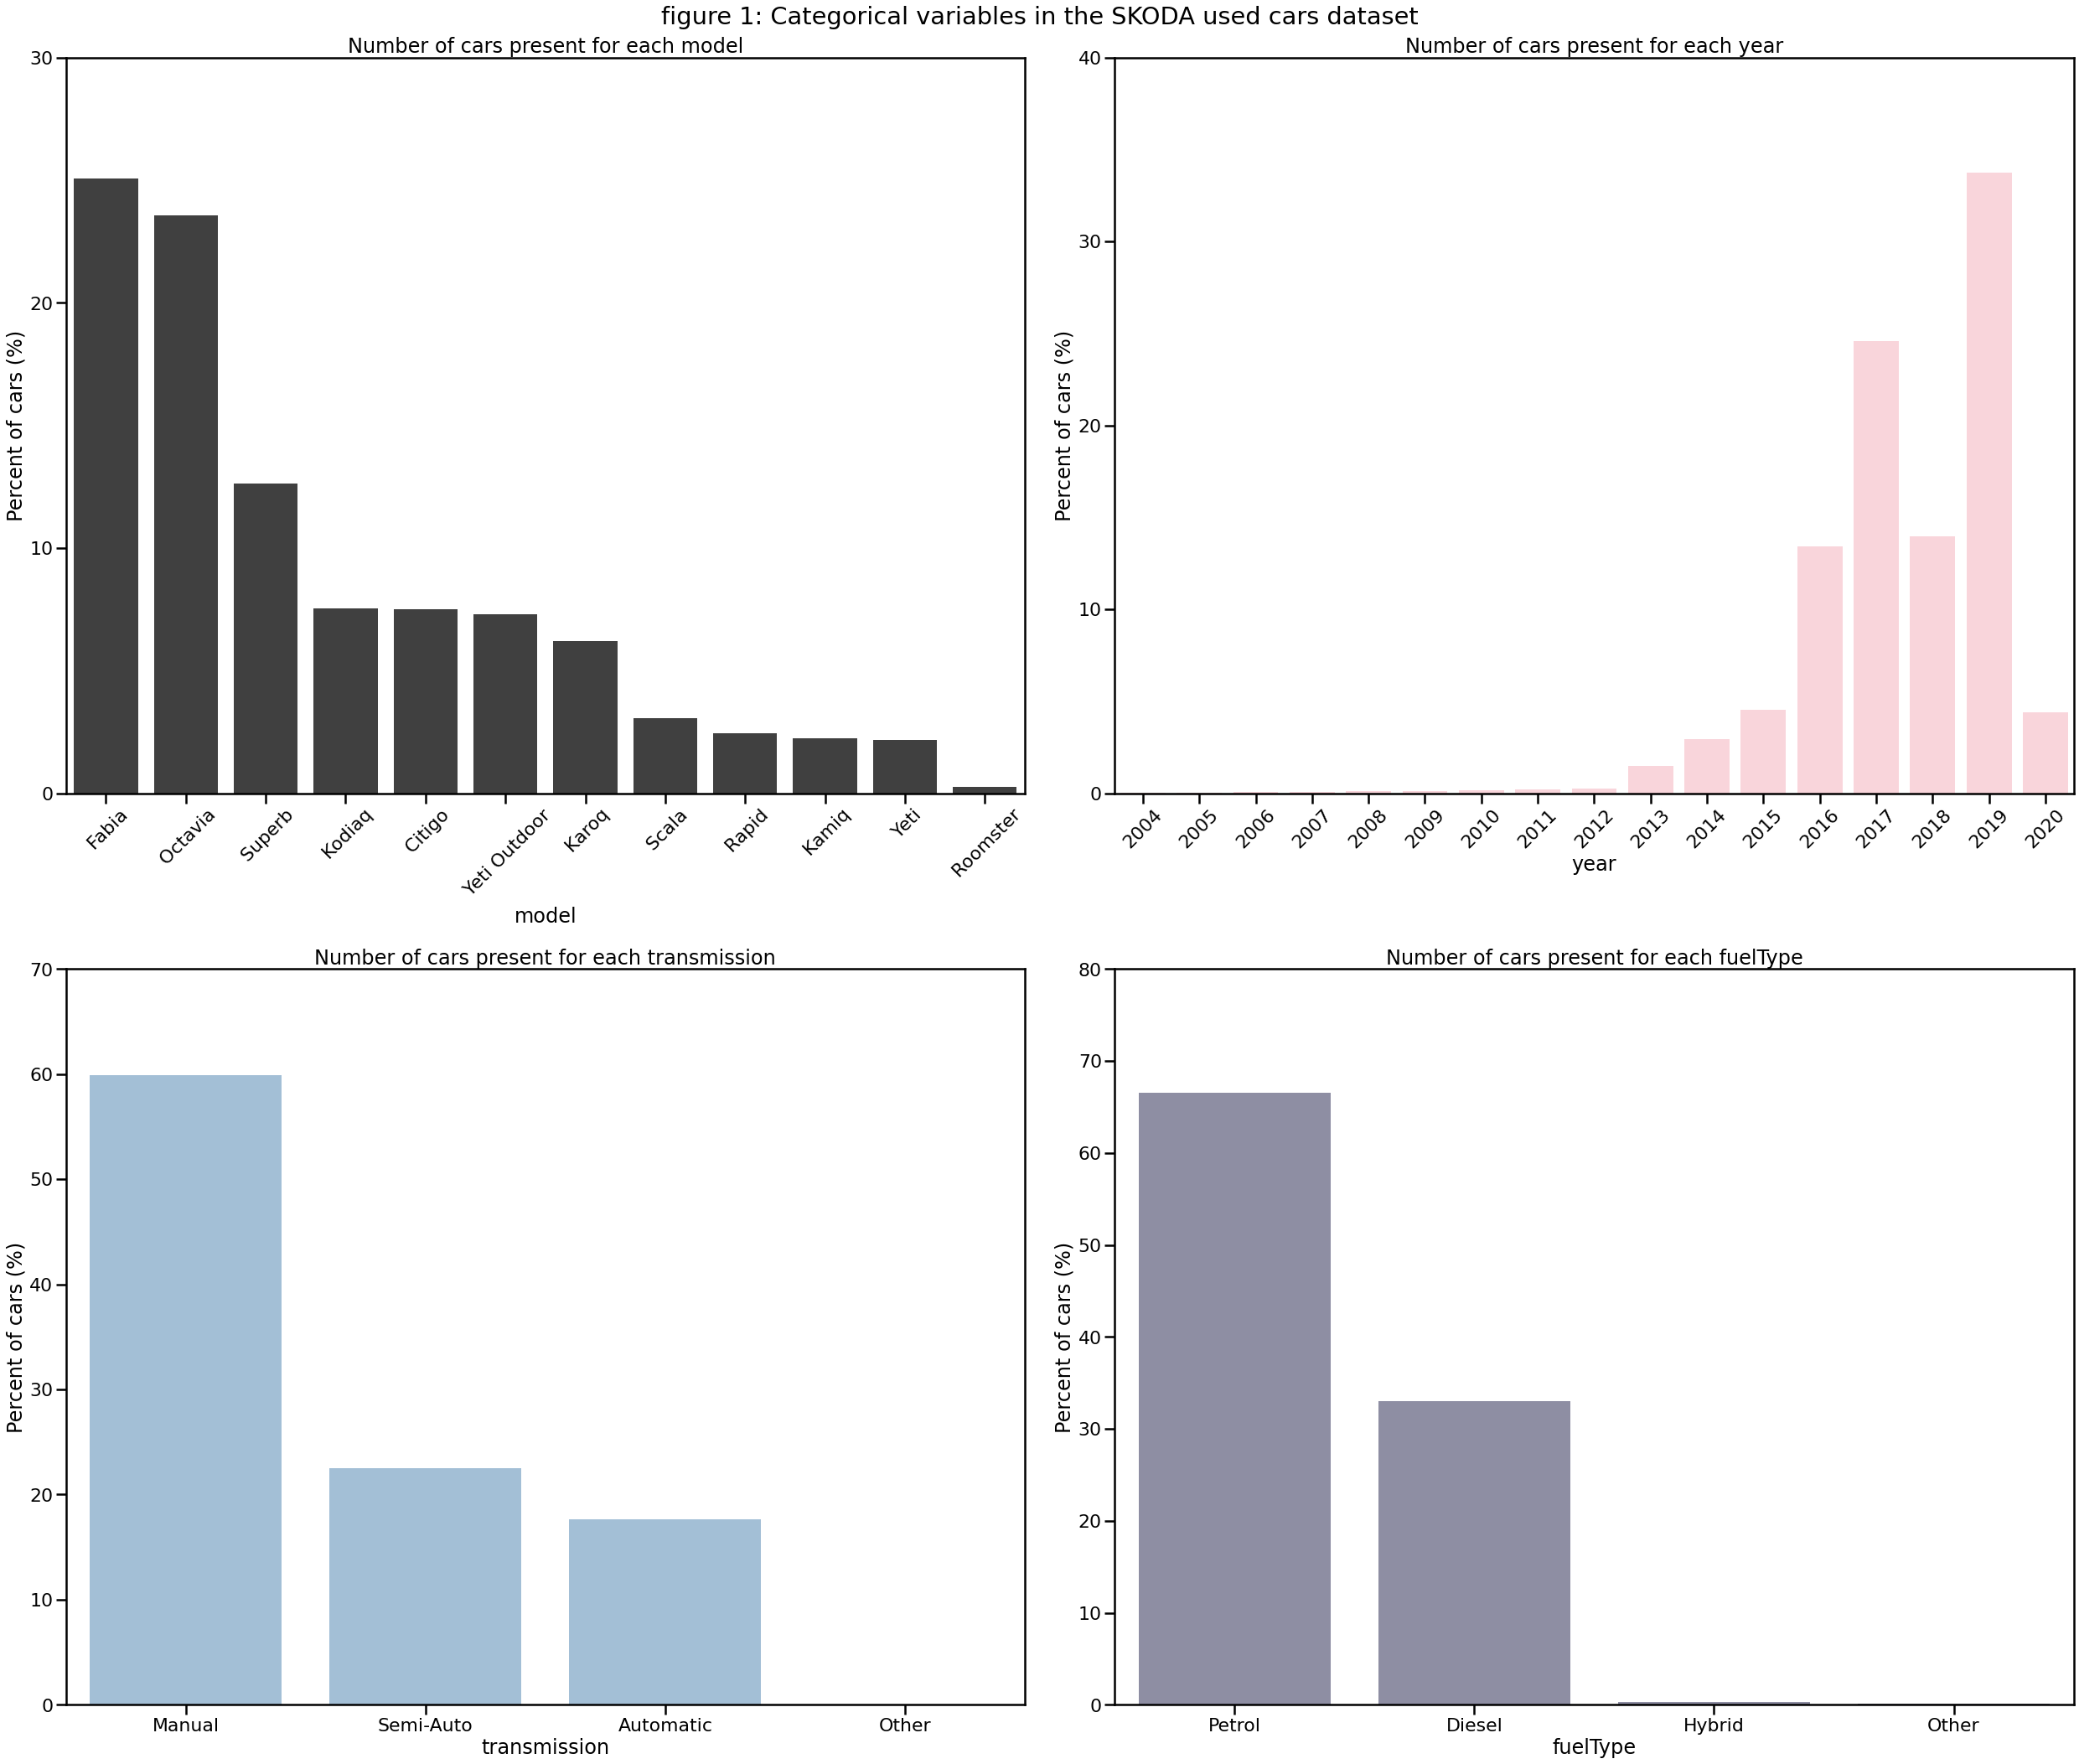

In [7]:
sns.set_context('poster')

plt.figure(figsize=(35,30))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'black', 45, np.arange(0,31,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'pink', 45, np.arange(0,41,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', '#7aabd4', 0, np.arange(0,71,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', '#646489', 0, np.arange(0,81,10))

# write the title for all the plots
plt.suptitle("figure 1: Categorical variables in the SKODA used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()
# display the plots
plt.show()

Here are 4 bar plotes indicating percentage of cars in y axis and varying the independent variables. respectively they are model ,year,transmission, fueltype. furthermore,  all are numerical data in both axis as we need numerical data for bar ploting!

# Scatter plots

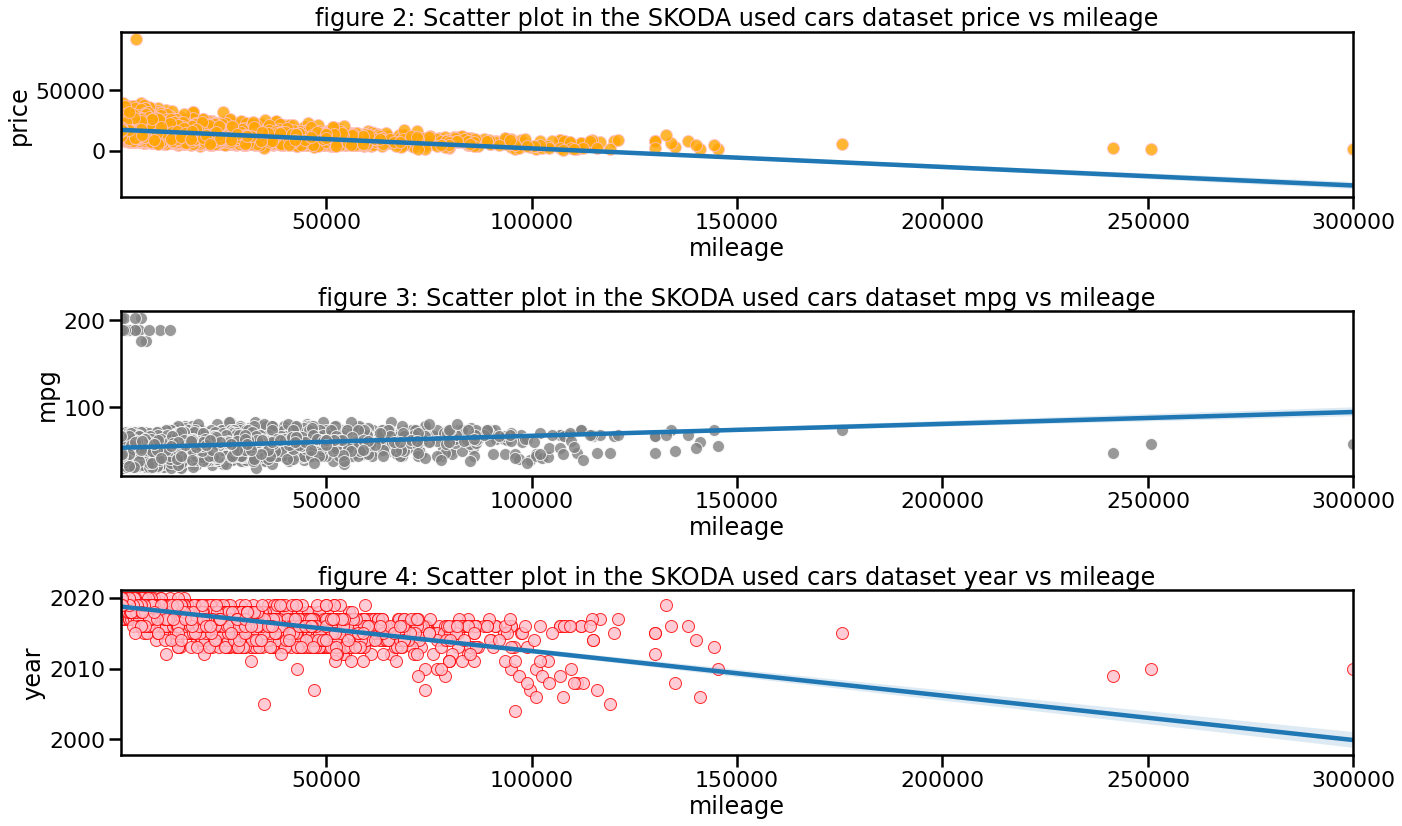

In [8]:
plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'color':'orange', 'edgecolor':'pink'})
plt.title("figure 2: Scatter plot in the SKODA used cars dataset price vs mileage")
# changing the color of the trend line
plt.subplot(3,1,2)
sns.regplot(x='mileage', y='mpg', data=df, scatter_kws={'color':'grey', 'edgecolor':'white'})
plt.title("figure 3: Scatter plot in the SKODA used cars dataset mpg vs mileage")
# changing the color of the scatter plot
plt.subplot(3,1,3)
sns.regplot(x='mileage', y='year', data=df, 
            scatter_kws={'color':'pink', 'edgecolor':'red'})
plt.title("figure 4: Scatter plot in the SKODA used cars dataset year vs mileage")
plt.tight_layout()
plt.show()

here you can see 3 scatter plots for changes in different numerical values in rotation to milaeage. In this case, fig 1, which is price vs mileage would be most preferable as it's correlation is more clear than other figure. Coming next, mpg vs mileage can also be used as a good data visualization. However, last one is not that preferable for linear equation.

# Histogram  & Distribution

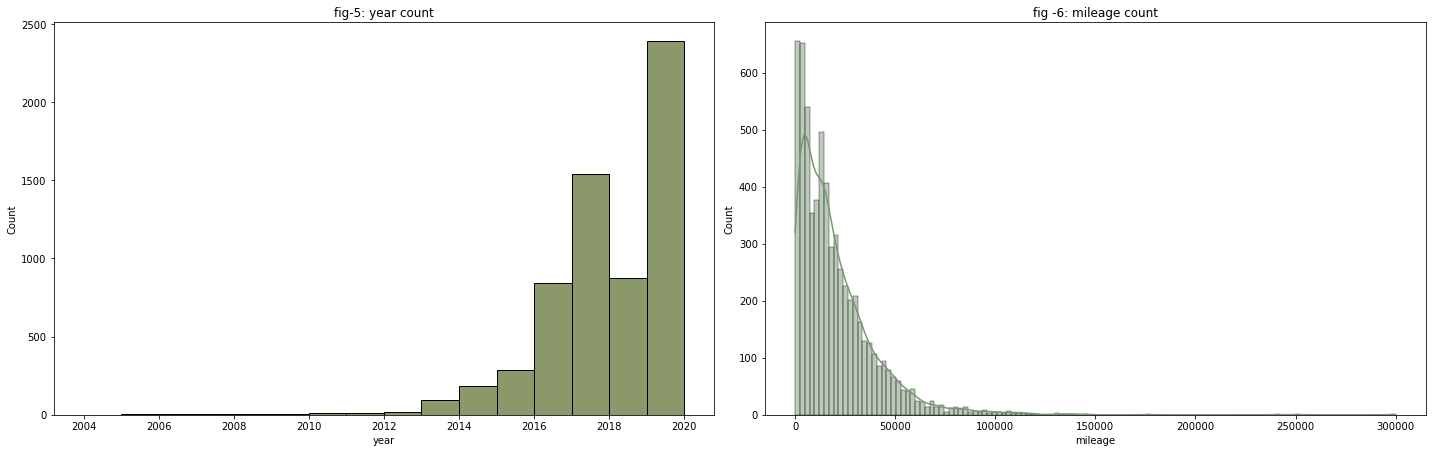

In [28]:

#histogram
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.histplot(data=df, x='year', color='#647637', binwidth= 1)
plt.title("fig-5: year count")

#distribution
plt.subplot(2,2,2)
sns.histplot(data=df, x='mileage', color='#789675', kde=True)
plt.title("fig -6: mileage count")



plt.tight_layout()
plt.show()

At fig 5 it's a histogram based on year. this df have highest count in the year of 2020, andalmost no count in 2005 and 2007. It's a bimodal graph. The next one, fig 6 refers a ditribution of mileage. In this case we can say it's a unimodal graph.

# ECDF(Empirical cumulative distribution function) plot

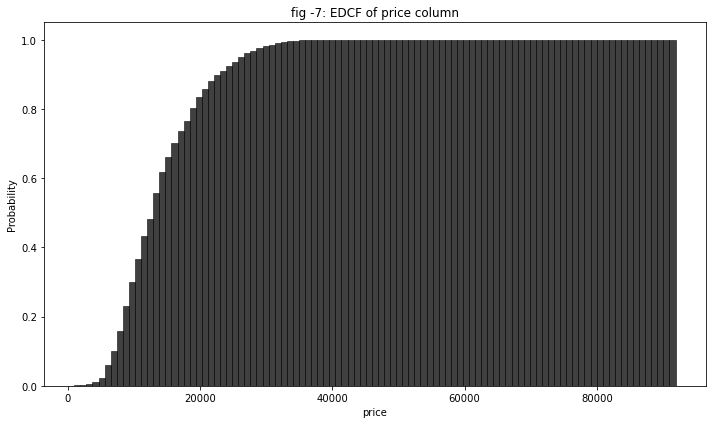

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='price', cumulative=True, color='black', stat='probability')
#plt.grid()
plt.title("fig -7: EDCF of price column")
plt.tight_layout()
plt.show()

It's a cumulative distribution function which provides a way to model the cumulative probability of the sample data and helps us to estimate the cumulative distribution function. Here figure-7 is a price probability  ECDF independent variable range from 0 to 80,000. It's a negative skew.